In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df = df.drop('Car_Name',axis=1)

In [8]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df['Vehicle_age'] = 2024 - df.Year

In [10]:
df['Price_increase'] = df.Present_Price - df.Selling_Price

In [11]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age,Price_increase
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10,2.24
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11,4.79
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7,2.60
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13,1.30
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10,2.27
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,8,2.10
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,9,1.90
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,15,7.65
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,7,1.00


In [12]:
df = df.drop('Year',axis=1)

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

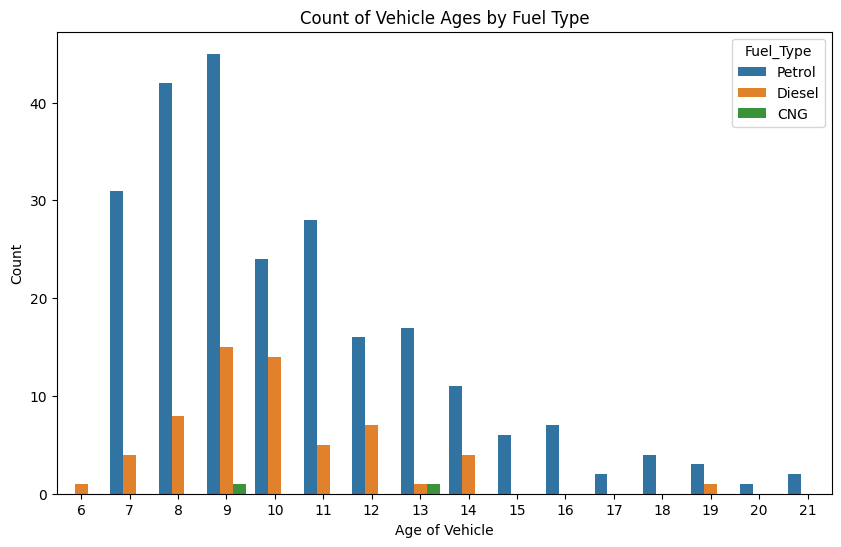

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_age', hue='Fuel_Type', data=df)
plt.title('Count of Vehicle Ages by Fuel Type')
plt.xlabel('Age of Vehicle')
plt.ylabel('Count')
plt.show()

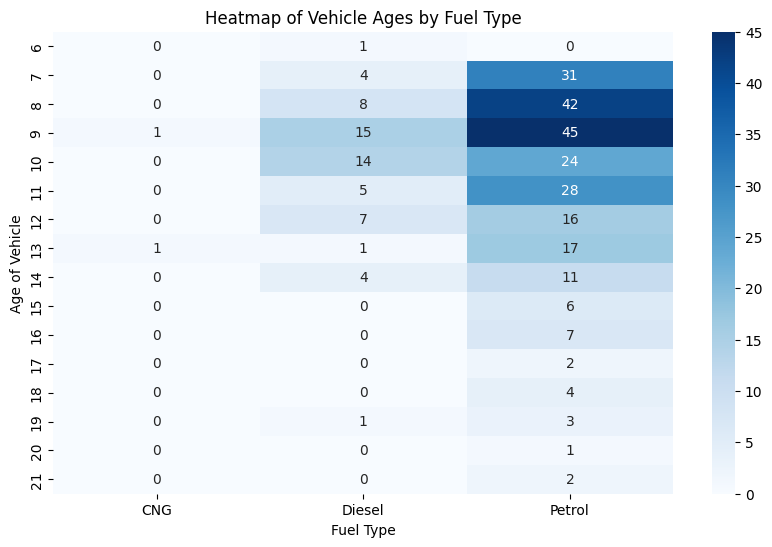

In [15]:
plt.figure(figsize=(10, 6))
heatmap_data = df.groupby(['Vehicle_age', 'Fuel_Type']).size().unstack().fillna(0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of Vehicle Ages by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Age of Vehicle')
plt.show()

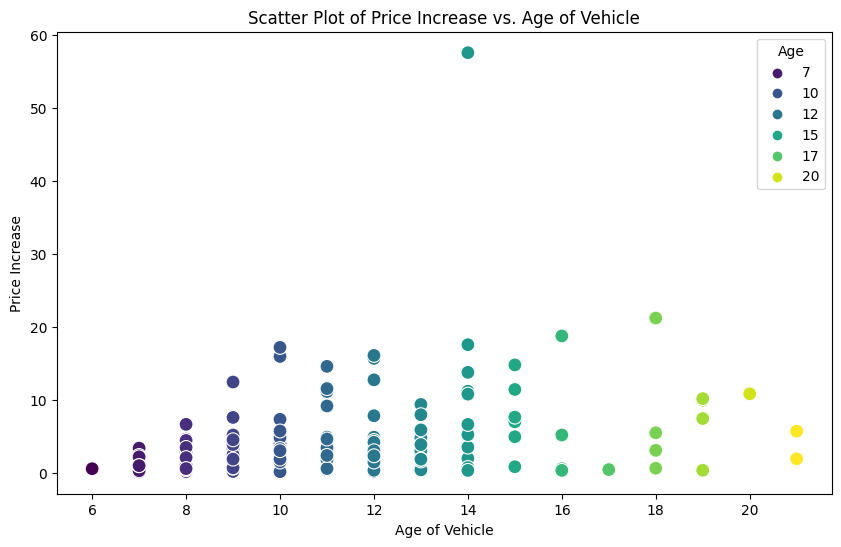

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle_age', y='Price_increase', data=df, hue='Vehicle_age', palette='viridis', s=100)
plt.title('Scatter Plot of Price Increase vs. Age of Vehicle')
plt.xlabel('Age of Vehicle')
plt.ylabel('Price Increase')
plt.legend(title='Age')
plt.show()

In [17]:
df=pd.get_dummies(df, drop_first=True)

In [18]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_age,Price_increase,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,2.24,False,True,False,True
1,4.75,9.54,43000,0,11,4.79,True,False,False,True
2,7.25,9.85,6900,0,7,2.60,False,True,False,True
3,2.85,4.15,5200,0,13,1.30,False,True,False,True
4,4.60,6.87,42450,0,10,2.27,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,8,2.10,True,False,False,True
297,4.00,5.90,60000,0,9,1.90,False,True,False,True
298,3.35,11.00,87934,0,15,7.65,False,True,False,True
299,11.50,12.50,9000,0,7,1.00,True,False,False,True


In [19]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_age,Price_increase,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.520881,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.864902,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.333832,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,0.107415,-0.053469,0.055687,0.124269,-0.050316
Vehicle_age,-0.236141,0.047584,0.524342,0.182104,1.000000,0.333746,-0.064315,0.059959,0.039896,-0.000394
Price_increase,0.520881,0.864902,0.333832,0.107415,0.333746,1.000000,0.265881,-0.263835,-0.336902,-0.237802
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,0.265881,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.263835,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.336902,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.237802,-0.098643,0.091013,0.063240,1.000000


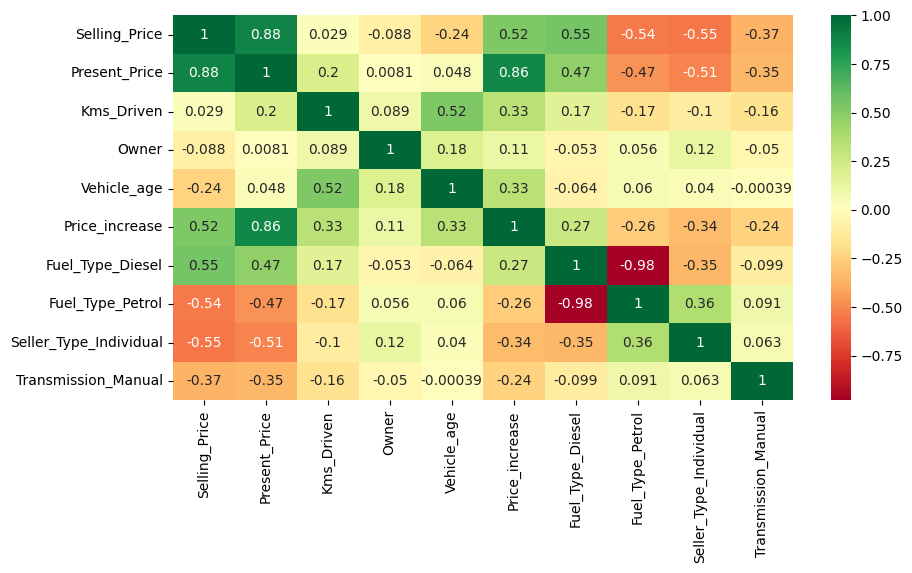

In [20]:
corrmap = df.corr()
top_corr_features = corrmap.index 
plt.figure(figsize=(10,5))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Split the data 

In [21]:
X = df.drop("Selling_Price", axis = 1)

# Dependent variables
y = df['Selling_Price']

In [22]:
from  sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[3.83460416e-01 3.06830588e-02 2.86693023e-04 6.06604415e-02
 6.16048517e-02 2.03491647e-01 1.68584324e-02 1.15422742e-01
 1.27531718e-01]


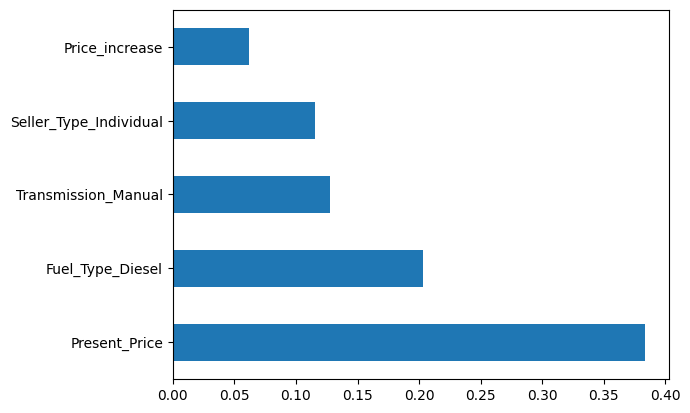

In [24]:
feature_importance =pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(5).plot(kind = 'barh')
plt.show()

Train the model

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [26]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

linr.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = linr.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

4.746747594455842e-26


In [29]:
from sklearn import metrics
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE :  4.746747594455842e-26
RMSE :  2.1787031909959288e-13


In [30]:
from sklearn.metrics import r2_score, adjusted_rand_score

print(r2_score(y_test, y_pred))

1.0


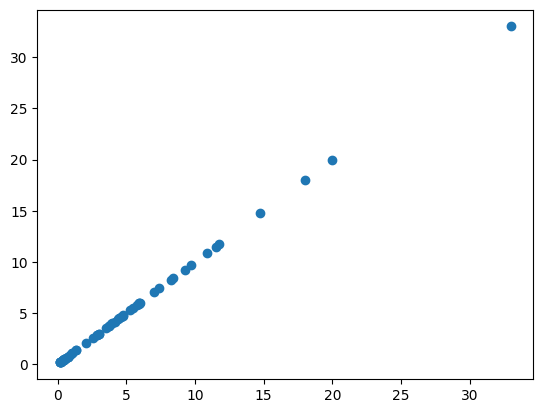

In [31]:
plt.scatter(y_test, y_pred) 

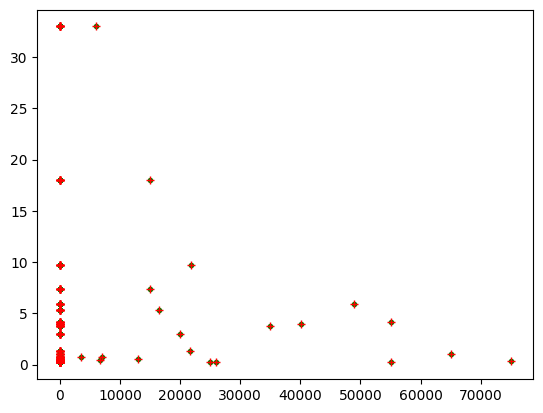

In [32]:
plt.plot(x_test[20:40], y_test[20:40], '.', color = 'green')
plt.plot(x_test[20:40], y_pred[20:40], '+', color = 'red')
plt.show()

In [33]:
data= {
    'Actuel':y_test[:20] , 
    'Predict': y_pred[:20],
    'Taux':y_pred[:20] - y_test[:20]
}
df1 = pd.DataFrame(data)
df1

,Actuel,Predict,Taux
258,8.40,8.40,3.730349e-14
154,0.50,0.50,9.692247e-14
227,2.55,2.55,-7.327472e-14
126,0.90,0.90,1.200151e-13
268,4.80,4.80,5.861978e-14
1,4.75,4.75,-2.575717e-14
59,19.99,19.99,-2.486900e-14
192,0.20,0.20,-4.193867e-14
131,0.75,0.75,6.217249e-14
259,3.90,3.90,-4.440892e-16


[0.38251118 0.02877515 0.00089495 0.06420043 0.05451648 0.21004254
 0.0162012  0.11030747 0.1325506 ]


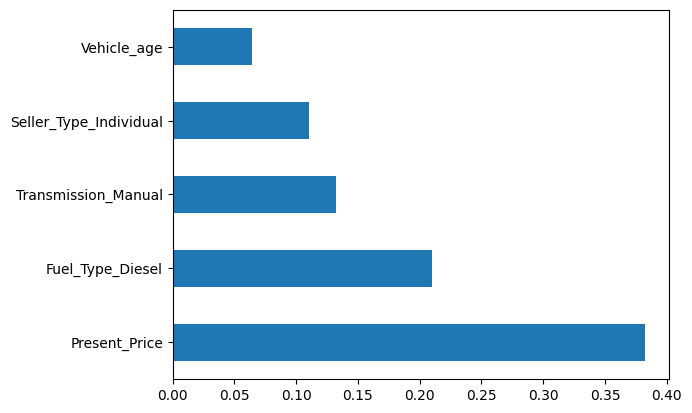

Mean Squared Error: 1.4491785146706008e-27
R-squared: 1.0


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df contains your dataset
X = df.drop("Selling_Price", axis=1)
y = df['Selling_Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature importance analysis
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

# Linear Regression
linr = LinearRegression()
linr.fit(x_train, y_train)

y_pred = linr.predict(x_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
